# Use AutoEncoding with force_torque_sensor

--------------------------------------------------------------------

Datasets paper: https://arxiv.org/pdf/1807.06749.pdf

Download: https://ibm.ent.box.com/s/vw4y576xlz6ujblpl3gz9c5ttu51qc18



In [1]:
import numpy as np 

sides_3 = np.load('../data/force_torque_sensor/Dataset/3_sides/Data/data.npy')
sides_4 = np.load('../data/force_torque_sensor/Dataset/4_sides/Data/data.npy')
sides_5 = np.load('../data/force_torque_sensor/Dataset/5_sides/Data/data.npy')
sides_6 = np.load('../data/force_torque_sensor/Dataset/6_sides/Data/data.npy')
sides_200 = np.load('../data/force_torque_sensor/Dataset/200_sides/Data/data.npy')


import numpy as np 
from collections import namedtuple
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
import plotly


/home/jim/anaconda2/envs/clustering/lib/python3.5/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
names = {
    0:"Force x",
    1:"Force y",
    2:"Force z",
    3:"Moment x",
    4:"Moment y",
    5:"Moment z",
    6:"Peg Position x",
    7:"Peg Position y",
    8:"Peg Position z",
    9:"Angle",
    10:"Time",
    11:"Counter",
}

# data = []
# sides=sides_200

# for i in range(len(sides[0])):
#     k=0
#     samples=[]
    
#     for j in range(15853):
#         samples.append(sides[k][i])
#         k+=100
        
#     trace0 = go.Scatter(
#         x=np.linspace(0, len(samples)-1, num=len(samples), endpoint=True),
#         y=samples,
#         mode='lines+markers',
#         name=names[i],
#         hoverinfo='name',
        
#         marker=dict(
#                 size=3.5,
#         ),
#         line=dict(
#             shape='linear',
# #             color=colors[i],
#              width=0.4,
#         )
#     )
#     data.append(trace0)

# layout = dict(
#     legend=dict(
#         y=0.5,
#         traceorder='reversed',
#         font=dict(
#             size=16
#         )
#     )
# )

# fig = go.Figure(data=data, layout=layout)


# fig = dict(data=data, layout=layout)
# plotly.offline.init_notebook_mode()
# plotly.offline.iplot(fig)


# # py.iplot(fig, filename='force_torque_dataset_sides_200_all')

1585353


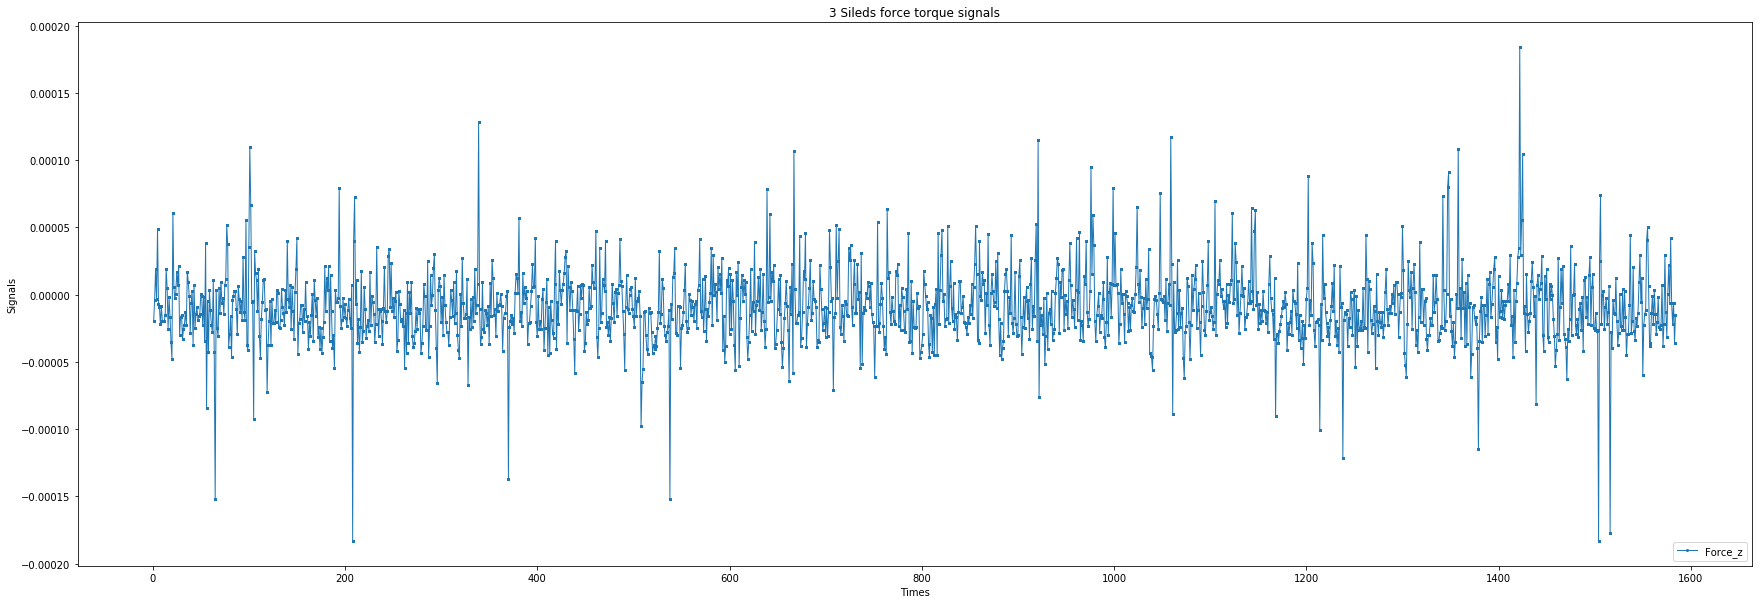

In [3]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

cmap=plt.cm.get_cmap(plt.cm.viridis,143)


# plt.rcParams['font.size'] = 11.
# plt.rcParams['font.family'] = 'Comic Sans MS'
# plt.rcParams['axes.labelsize'] = 15.
# plt.rcParams['xtick.labelsize'] = 10.
# plt.rcParams['ytick.labelsize'] = 10.

plt.figure(figsize=(30,10))



sides = sides_3
print(len(sides))

Force_x = sides[:,0] 
Force_y = sides[:,1]
Force_z = sides[:,2]
Moment_x = sides[:,3]
Moment_y = sides[:,4]
Moment_z = sides[:,5]
Peg_Position_x = sides[:,6]
Peg_Position_y = sides[:,7]
Peg_Position_z = sides[:,8]
Angle = sides[:,9]
Time = sides[:,10]
Counter = sides[:,11]


# plt.plot(Time, Force_x, marker='s', linestyle='-', markersize=2, linewidth=1, label='Force_x')
# plt.plot(Time, Force_y, marker='o', linestyle='-', markersize=2, linewidth=1, label='Force_y')
plt.plot(Time, Force_z, marker='o', linestyle='-', markersize=2, linewidth=1, label='Force_z')

# plt.plot(Time, Moment_x, marker='o, linestyle='-', label='Moment_x')
# plt.plot(Time, Moment_y, marker='o, linestyle='-', label='Moment_y')
# plt.plot(Time, Moment_z, marker='o, linestyle='-', label='Moment_z')

# plt.plot(Time, Peg_Position_x, marker='o', linestyle='-', label='Peg_Position_x')
# plt.plot(Time, Peg_Position_y, marker='o', linestyle='-', label='Peg_Position_y')
# plt.plot(Time, Peg_Position_z, marker='o', linestyle='-', label='Peg_Position_z')

# plt.plot(Time, Angle, marker='o', linestyle='-', label='Angle')
# plt.plot(Time, Counter, marker='o', linestyle='-', label='Counter')


plt.xlabel('Times')
plt.ylabel('Signals')
plt.title('3 Sileds force torque signals')
plt.legend(loc='lower right')
plt.show()


In [4]:
print (len(sides_3))
print (len(sides_3[0]))

import torch.utils.data
train_loader = torch.utils.data.DataLoader(sides_3, batch_size=2000, num_workers=4)

print (train_loader)

1585353
12


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable



# define the NN architecture
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        ## encoder ##
        # linear layer (784 -> encoding_dim)
        self.fc1 = nn.Linear(12,8)
#         self.fc2 = nn.Linear(2000,500)
#         self.fc3 = nn.Linear(500,250)
#         self.fc4 = nn.Linear(250,125)
        self.fc5 = nn.Linear(8, encoding_dim)
        
        ## decoder ##
        # linear layer (encoding_dim -> input size)
        self.fc6 = nn.Linear(encoding_dim, 8)
#         self.fc7 = nn.Linear(125,250)
#         self.fc8 = nn.Linear(250,500)
#         self.fc9 = nn.Linear(500,2000)
        self.fc10 = nn.Linear(8,12)
        
#         self.dropout = nn.Dropout(0.25)
        

    def forward(self, x):
        # add layer, with relu activation function
        x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        # output layer (sigmoid for scaling from 0 to 1)
        x = F.relu(self.fc6(x))
#         x = F.relu(self.fc7(x))
#         x = F.relu(self.fc8(x))
#         x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        return x    

# initialize the NN
encoding_dim = 2
model = Autoencoder(encoding_dim)
print(model)

use_cuda = torch.cuda.is_available
if use_cuda:
    model.cuda()

Autoencoder(
  (fc1): Linear(in_features=12, out_features=8, bias=True)
  (fc5): Linear(in_features=8, out_features=2, bias=True)
  (fc6): Linear(in_features=2, out_features=8, bias=True)
  (fc10): Linear(in_features=8, out_features=12, bias=True)
)


In [6]:
params = list(model.named_parameters())
print(params)

[('fc1.weight', Parameter containing:
tensor([[-0.2112, -0.1576,  0.2580,  0.0303,  0.0876,  0.0361,  0.0872,  0.2724,
         -0.2015, -0.0966, -0.1419, -0.2013],
        [-0.1413,  0.1757,  0.1271,  0.0615,  0.1285, -0.2279, -0.0509, -0.1438,
         -0.1160, -0.0328,  0.0015,  0.1586],
        [-0.1944,  0.2885, -0.1836,  0.2506, -0.2202,  0.1167, -0.1216, -0.2046,
          0.2337,  0.0632,  0.0144,  0.2571],
        [-0.0274,  0.0520,  0.1333,  0.1277,  0.0018,  0.1303,  0.2296, -0.1412,
         -0.2261,  0.0900,  0.1135,  0.2413],
        [ 0.0141,  0.0089, -0.0422, -0.1854, -0.2320,  0.1682,  0.1721,  0.2383,
         -0.1575, -0.0562,  0.0933,  0.1666],
        [ 0.0534,  0.2504, -0.2853,  0.0213, -0.1730,  0.0370,  0.2130,  0.0908,
         -0.1986, -0.2812,  0.2250,  0.2723],
        [-0.2118, -0.2747,  0.1775, -0.0393, -0.1675,  0.0368,  0.1922, -0.0110,
          0.0478, -0.2265,  0.1932, -0.1384],
        [ 0.0192,  0.0112,  0.0371, -0.0285,  0.2260,  0.2554, -0.0138, -

In [7]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [8]:
# import pdb

# number of epochs to train the model
n_epochs = 100

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for d in train_loader:
        if use_cuda:
            data = d.cuda().float()
        else:
            data = d.float()
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(data)
        # calculate the loss
#         pdb.set_trace()
        loss = criterion(outputs, data)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()
#         print (train_loss)
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 630.568092
Epoch: 2 	Training Loss: 1149.456451
Epoch: 3 	Training Loss: 576.551813
Epoch: 4 	Training Loss: 577.344241
Epoch: 5 	Training Loss: 577.969732
Epoch: 6 	Training Loss: 578.463683
Epoch: 7 	Training Loss: 578.855786
Epoch: 8 	Training Loss: 579.169908
Epoch: 9 	Training Loss: 579.423751
Epoch: 10 	Training Loss: 579.631503
Epoch: 11 	Training Loss: 579.804118
Epoch: 12 	Training Loss: 579.950096
Epoch: 13 	Training Loss: 580.075735
Epoch: 14 	Training Loss: 580.185960
Epoch: 15 	Training Loss: 580.284492
Epoch: 16 	Training Loss: 580.374473
Epoch: 17 	Training Loss: 580.457487
Epoch: 18 	Training Loss: 580.535674
Epoch: 19 	Training Loss: 580.609924
Epoch: 20 	Training Loss: 580.681241
Epoch: 21 	Training Loss: 580.750724
Epoch: 22 	Training Loss: 580.818263
Epoch: 23 	Training Loss: 580.884840
Epoch: 24 	Training Loss: 580.950587
Epoch: 25 	Training Loss: 581.015144
Epoch: 26 	Training Loss: 581.079623
Epoch: 27 	Training Loss: 581.143860
Epoch: 28

In [17]:
params = list(model.named_parameters())

In [20]:
# torch.save(model, 'ae.pkl')

In [18]:
# torch.save({'state_dict': model.state_dict()}, 'ae.pth.tar')

In [19]:
# ae = model(encoding_dim)
# checkpoint = torch.load('ae.pth.tar')
# mae.load_state_dict(checkpoint['state_dict'])

In [21]:
slides_3_generate = []
latent_space = []

for test in sides_3:
    test_loader = torch.from_numpy(test).cuda().float()
#     latent = vae.encoder(test_loader)
    output = model(test).detach().cpu().numpy()
    
    slides_3_generate.append(output)
#     latent_space.append(latent[0].detach().cpu().numpy())
    

print (len(slides_3_generate))

np.save('slides_3_generate.npy',slides_3_generate)
# np.save('latent_space.npy',latent_space)

AttributeError: 'numpy.ndarray' object has no attribute 'dim'